# 1. Getting VizDoom Up and Running


In [ ]:
!pip install vizdoom

In [ ]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom

In [2]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np

In [3]:
# Setup game
game = DoomGame()
game.load_config('./scenarios/deathmatch.cfg')
game.init()

In [4]:
# This is the set of actions we can take in the environment
actions = np.identity(3, dtype=np.uint8)

In [5]:
state = game.get_state()

In [6]:
state.game_variables

array([  0.,   0., 100.,   0.,   2.,  50.,   0.,  50.,   0.,  50.,   0.,
         1.,   1.,   0.,   0.,   0.])

In [7]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
reward: 0.0
rewa

KeyboardInterrupt: 

In [8]:
game.close()

# 2. Converting it to a Gym Environment


In [10]:
!pip install gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827621 sha256=5501ba31ff1e88d6cd344786e77b60e4b3ae62279ad4db70846153260b01e11e
  Stored in directory: /Users/jakubdulas/Library/Caches/pip/wheels/95/51/6c/9bb05ebbe7c5cb8171dfaa3611f32622ca4658d53f31c79077
Successfully built gym


In [7]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [12]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('./scenarios/deathmatch.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [13]:
env = VizDoomGym(render=True)

In [14]:
state = env.reset()

# 3. View Game State


In [15]:
env.reset()

array([[[85],
        [40],
        [59],
        ...,
        [35],
        [29],
        [20]],

       [[71],
        [76],
        [83],
        ...,
        [34],
        [29],
        [24]],

       [[80],
        [71],
        [76],
        ...,
        [19],
        [36],
        [18]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [16]:
# Import Environment checker
from stable_baselines3.common import env_checker

In [17]:
env_checker.check_env(env)

AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

# 3. View State


In [18]:
!pip install matplotlib

In [19]:
from matplotlib import pyplot as plt

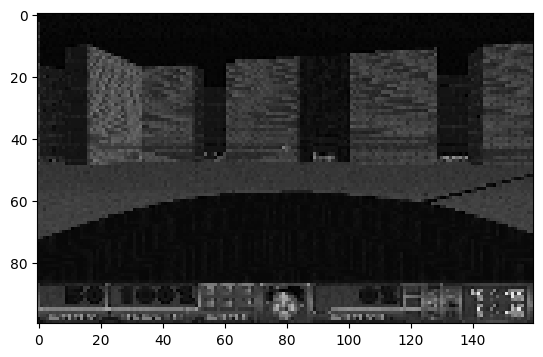

In [20]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [21]:
env.close()

# 4. Setup Callback


In [24]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [25]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [26]:
CHECKPOINT_DIR = './train/train_defend'
LOG_DIR = './logs/log_defend'

In [27]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# 5. Train Model


In [32]:
# import ppo for training
from stable_baselines3 import PPO

In [33]:
# Non rendered environment
env = VizDoomGym()

In [34]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=4096)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/opt/anaconda3/envs/vizdoom-rl/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [35]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_defend/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 174      |
|    ep_rew_mean     | -94.5    |
| time/              |          |
|    fps             | 34       |
|    iterations      | 1        |
|    time_elapsed    | 117      |
|    total_timesteps | 4096     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 178          |
|    ep_rew_mean          | -94.3        |
| time/                   |              |
|    fps                  | 26           |
|    iterations           | 2            |
|    time_elapsed         | 311          |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0086985305 |
|    clip_fraction        | 0.0948       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance

KeyboardInterrupt: 

# 6. Test the Model


In [ ]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# Reload model from disc
model = PPO.load('./train/train_defend/best_model_100000')

In [ ]:
# Create rendered environment
env = VizDoomGym(render=True)

In [ ]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

In [ ]:
mean_reward

In [ ]:
model.predict(obs)

In [ ]:
for episode in range(5): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)